In [1]:
import numpy as np
import h5py    
import os
import matplotlib.pyplot as plt
print(os.listdir())

['test_dws', 'sfactor.csv', '.DS_Store', 'sfactoryf.csv', 'sfactorxb.csv', 'test_armadillo.ipynb', 'sfactorxf.csv', 'sfactoryb.csv', 'read_matrix.m', 'pml_test_hz.h5', '.ipynb_checkpoints', 'pml_test_hz.csv', 'test_hz.csv', 'test_hz.h5']


['_MutableMapping__marker', '__abstractmethods__', '__bool__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_d', '_e', '_gcpl_crt_order', '_id', '_ipython_key_completions_', '_lapl', '_lcpl', '_libver', '_swmr_mode', 'attrs', 'clear', 'close', 'copy', 'create_dataset', 'create_dataset_like', 'create_group', 'create_virtual_dataset', 'driver', 'fid', 'file', 'filename', 'flush', 'get', 'id', 'items', 'keys', 'libver', 'mode', 'move', 'name', 'parent', 'pop', 'popitem', 'ref', 'regionref', 'requir

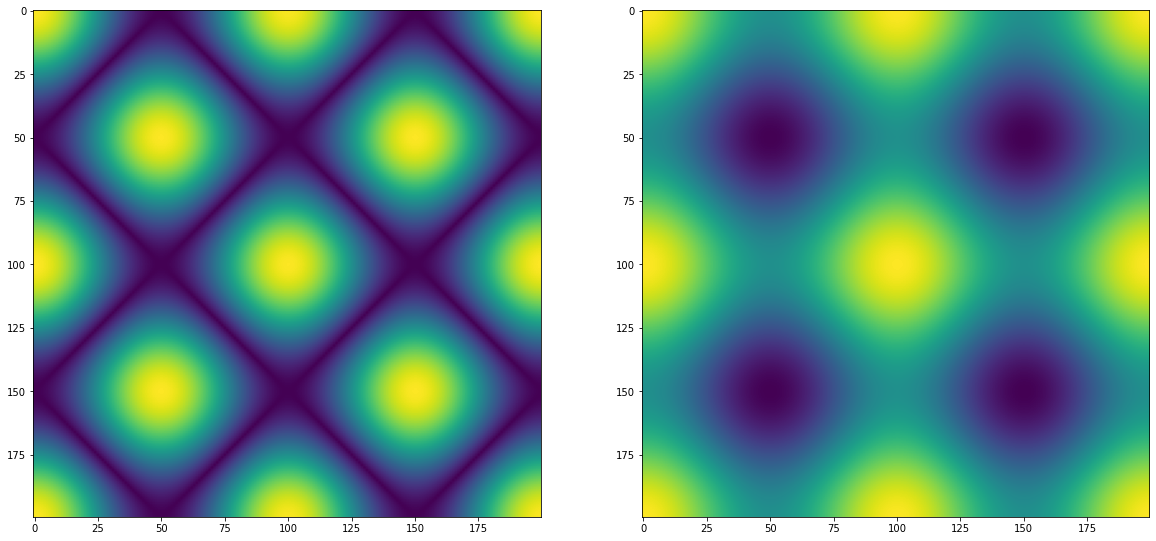

In [2]:
fileName = "test_hz.h5";  
hf = h5py.File(fileName, 'r')
print(dir(hf))    
# from pathlib import Path
# data = Path(fileName).read_bytes()

import csv


filename = 'test_hz.csv'
import csv

processed = [];
with open(filename, 'r') as f:
    lines = ' '.join([s.replace(',', '.') for s in f.readlines()])
    #print(lines.split())
    
    for i in lines.split():
        i = i.replace('i','j')
        processed.append(complex(i));
processed = np.array(processed)
processed = np.reshape(processed, (200,200))

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(abs(processed))
plt.subplot(122)
plt.imshow(np.imag(processed))

plt.show();
       

# with open(filename, "r") as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=",")

#     for row in csvreader:
#         print(row)

# data = np.genfromtxt(filename, dtype=complex, delimiter=',',autostrip=True);
# print(data.shape)
# print(data)

#print(np.loadtxt(filename).view(complex))

## Test sfactor for pml
backwards has an issue

200
200


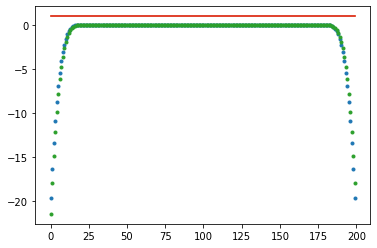

40000
40000


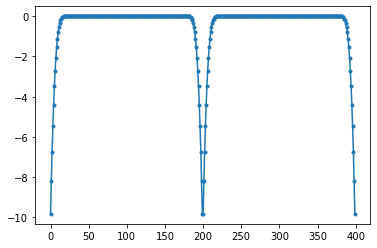

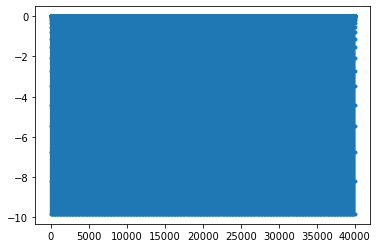

In [77]:

for filename in ["sfactorxf.csv","sfactoryb.csv"]:#"sfactorxf.csv","sfactorxb.csv"
    with open(filename, 'r') as f:
        #lines = ' '.join([s.replace(',', '.') for s in f.readlines()])
        #print(lines.split())
        line = f.readlines()[0].strip().split(',');
        line = [i.replace('i','j') for i in line];
        sfact = [complex(i.replace('+-', '-')) for i in line]
        print(len(sfact))

    plt.plot(np.imag(sfact), '.')
    plt.plot(np.real(sfact))
plt.show();

## check diagonal
for filename in ["sxf_diagonal.csv"]:#"sfactorxf.csv","sfactorxb.csv"
    with open(filename, 'r') as f:
        #lines = ' '.join([s.replace(',', '.') for s in f.readlines()])
        #print(lines.split())
        line = f.readlines()[0].strip().split(',');
        line = [i.replace('i','j') for i in line];
        sfact = [complex(i.replace('+-', '-')) for i in line]
        print(len(sfact))
    print(len(sfact))
    plt.plot(np.imag(sfact[-400:]), '.-')
    #plt.xlim(150,250)
    plt.show();
    plt.plot(np.imag(sfact[:]), '.-')

    


(200, 200)


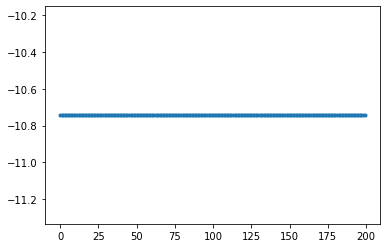

In [65]:
for filename in ["Sx_f_2D.csv"]:#"Sy_f_2D.csv","Sx_b_2D.csv", "Sy_b_2D.csv"]:#"sfactorxf.csv","sfactorxb.csv"
    processed = [];
    with open(filename, 'r') as f:
        #lines = ' '.join([s.replace(',', '.') for s in f.readlines()])
        #print(lines.split())
        data = []
        allstuff = f.readlines();
        for j in range(200):
            line = allstuff[j].strip().split(',');

            line = [i.replace('i','j') for i in line];
            #print(len(line))
            sfact = [complex(i.replace('+-', '-')) for i in line]
            data.append(sfact)
        data = np.array(data);
        print(data.shape)
        plt.plot(np.imag(data[:,0]), '.')
        #plt.plot(np.imag(data[:,100]), '.')

# plt.show();

## test pml
pml is still not good, but it works "basically", I think the issue must now be in the "symmetry" of the PML

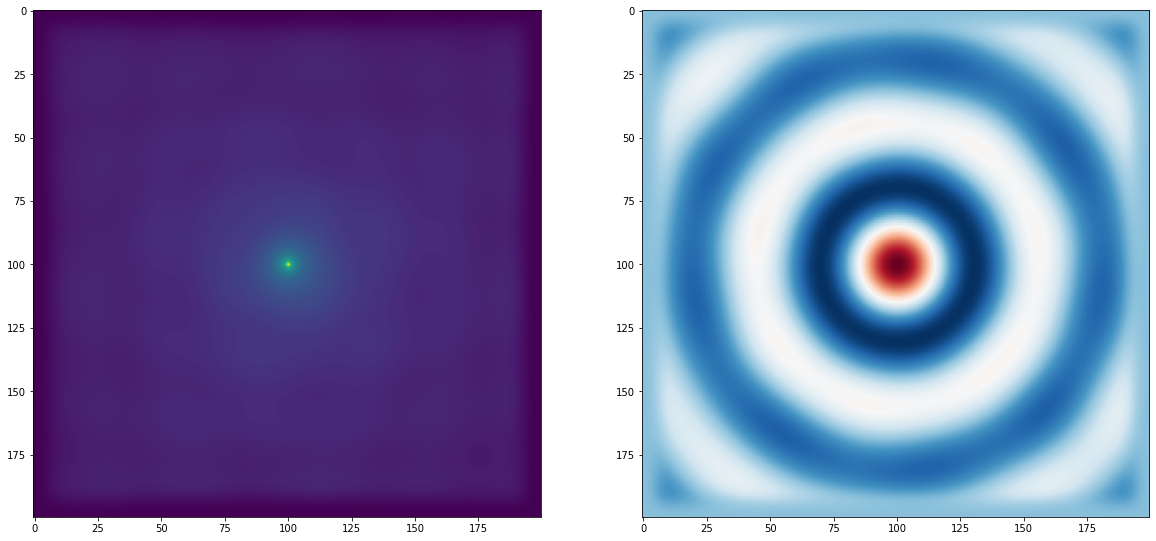

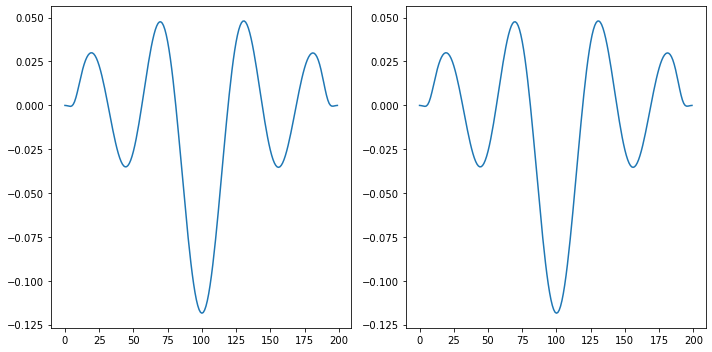

In [84]:
filename = 'pml_test_hz.csv'
import csv

processed = [];
with open(filename, 'r') as f:
    lines = ' '.join([s.replace(',', '.') for s in f.readlines()])
    #print(lines.split())
    
    for i in lines.split():
        i = i.replace('i','j')
        processed.append(complex(i));
processed = np.array(processed)
processed = np.reshape(processed, (200,200))

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.imshow(abs(processed))
plt.subplot(122)
plt.imshow(np.real(processed), cmap = 'RdBu')

plt.show();

## values at end should terminate at 0, but they don't so the pml is fucked
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.plot(np.real(processed[:,100]))
plt.subplot(122)
plt.plot(np.real(processed[100,:]))
plt.tight_layout();
